## Testing different attributes on TGS Salt Dataset

https://www.kaggle.com/c/tgs-salt-identification-challenge

This notebook has a quick look at different Attribute options on the TGS Salt Dataset. The purpose of the hackathon is for explainable AI, so little time is spent testing or assessing the best attributes. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import bruges as bg
from PIL import Image
import os
from scipy.ndimage import generic_filter, sobel

In [3]:
x = np.load('C:/Users/EdwinBrown/Documents/Hackathon_2022/Data/np_array/x.npy')
y = np.load('C:/Users/EdwinBrown/Documents/Hackathon_2022/Data/np_array/y.npy')

In [4]:
# Arrays shapes are (N, N_Samples, N_Traces)
print(x.shape, y.shape)

(4000, 101, 101) (4000, 101, 101)


## Functions to calculate Attributes

In [28]:
def rms(data):
    """
    Root mean square.
    
    Example
    >>> rms([3, 4, 5])
    4.08248290463863
    """
    data = np.asanyarray(data)
    return np.sqrt(np.sum(data**2) / data.size)

def attribute_wrapper(input_data, attribute_func, output_shape=None, **kwargs):
    image = np.reshape(input_data, newshape=(1, 101, 101))
    attribute = attribute_func(image, **kwargs)
    
    if output_shape is None:
        return np.reshape(attribute, input_data.shape)
    else:
        return np.reshape(attribute, output_shape)
    
def run_attributes(input_data):
    phase = attribute_wrapper(input_data, bg.attribute.instantaneous_phase)
    envelope = attribute_wrapper(input_data, bg.attribute.envelope)
    semb = attribute_wrapper(input_data, bg.attribute.similarity, duration=5, dt=1, step_out=3, kind='gst')
    seismic_rms = attribute_wrapper(input_data, attribute_func=generic_filter, function=rms, size=(1, 5, 5))
    discontinuity = attribute_wrapper(input_data, bg.attribute.discontinuity, duration=5, dt=1)
    energy = attribute_wrapper(input_data, bg.attribute.energy, duration=5, dt=1)
    sobel_image = sobel(input_data)

    
    attr_dict = {
        'Phase': phase, 
        'Amplitude': envelope, 
        'Semblance': semb, 
        'Windowed RMS': seismic_rms, 
        'Discontinuity': discontinuity, 
        'Energy': energy,
        'Sobel (Edge Detection)': sobel_image

    }
    return attr_dict
    
    

# Plotting

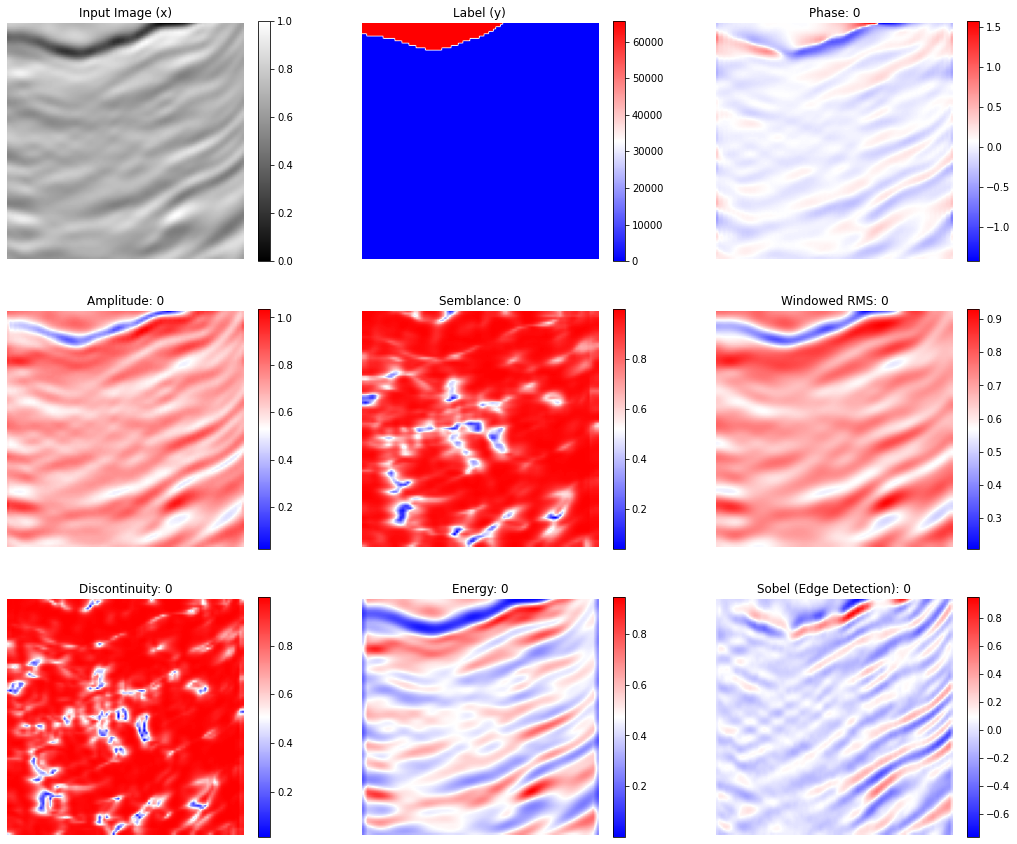

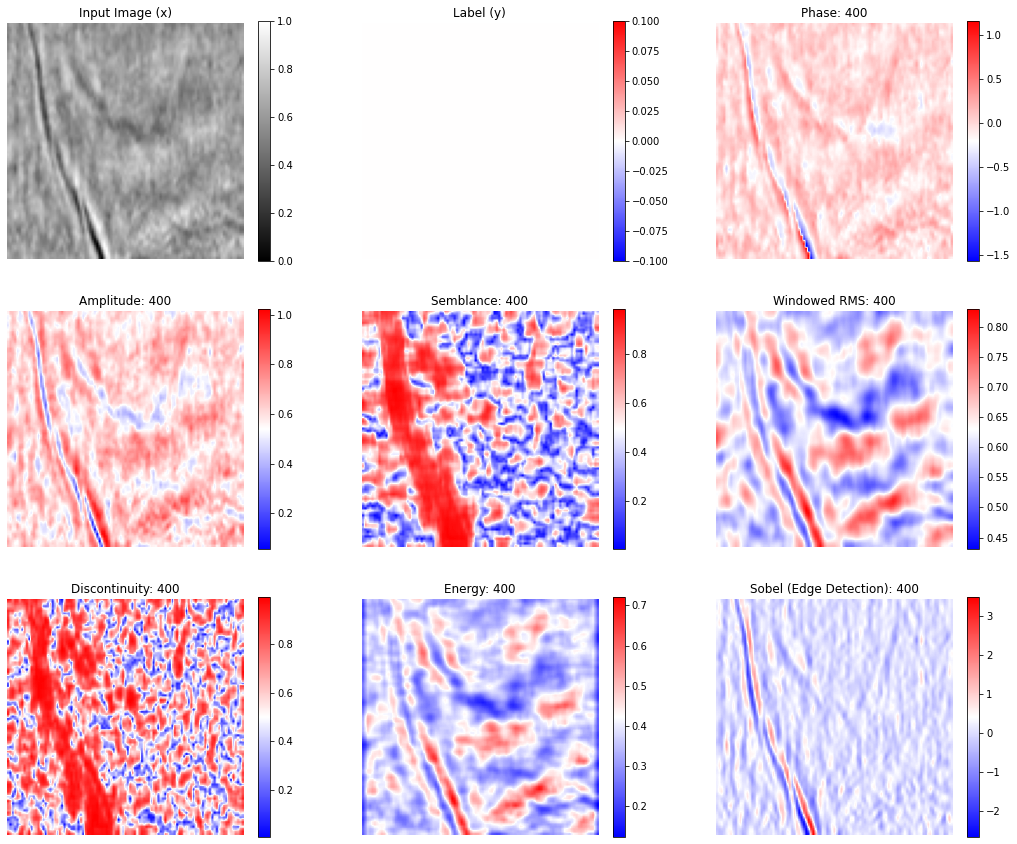

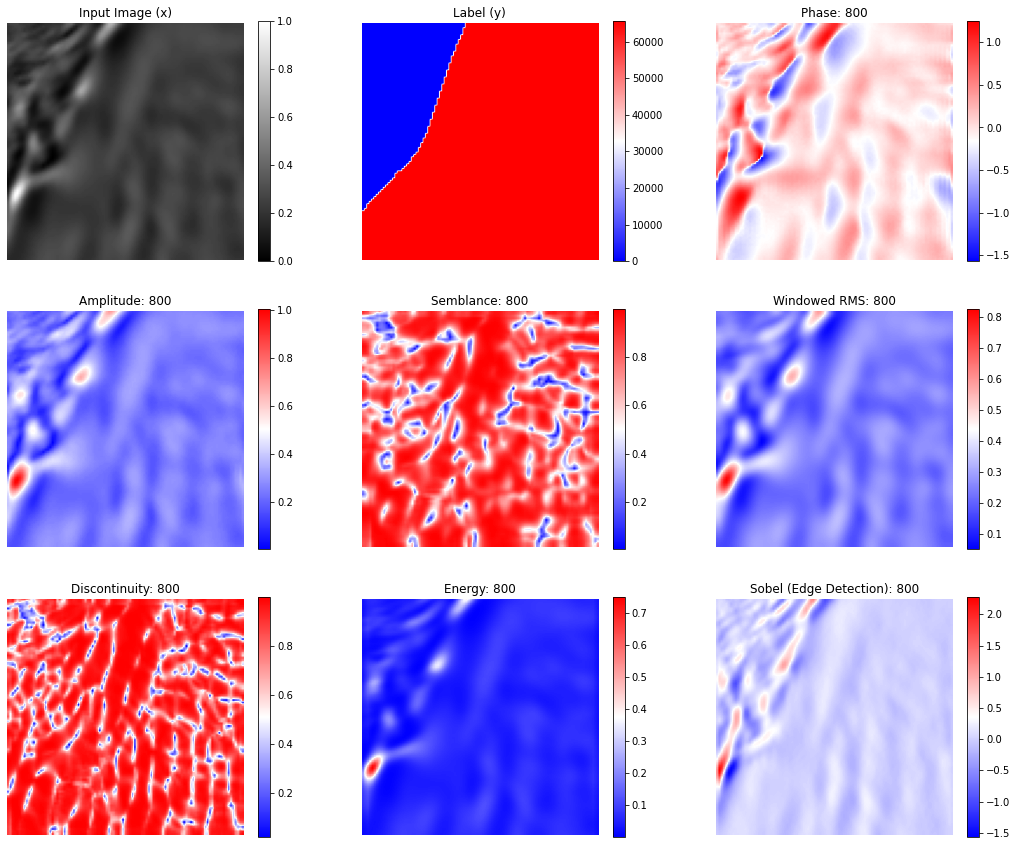

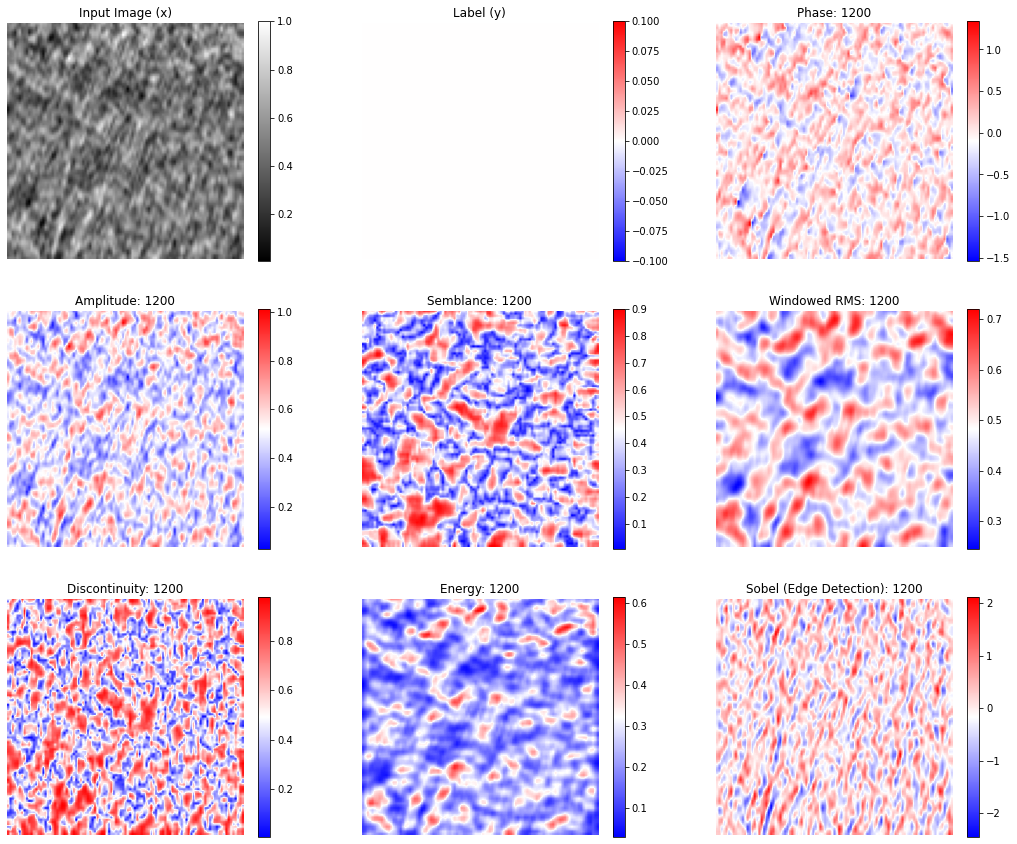

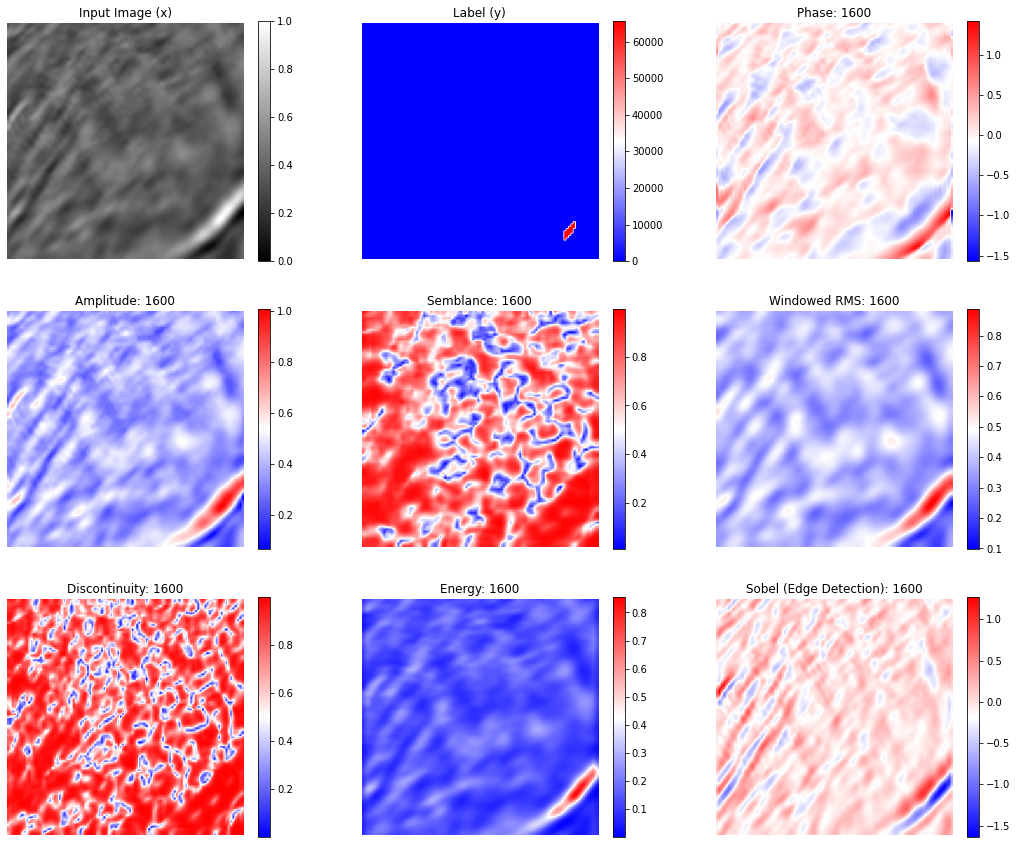

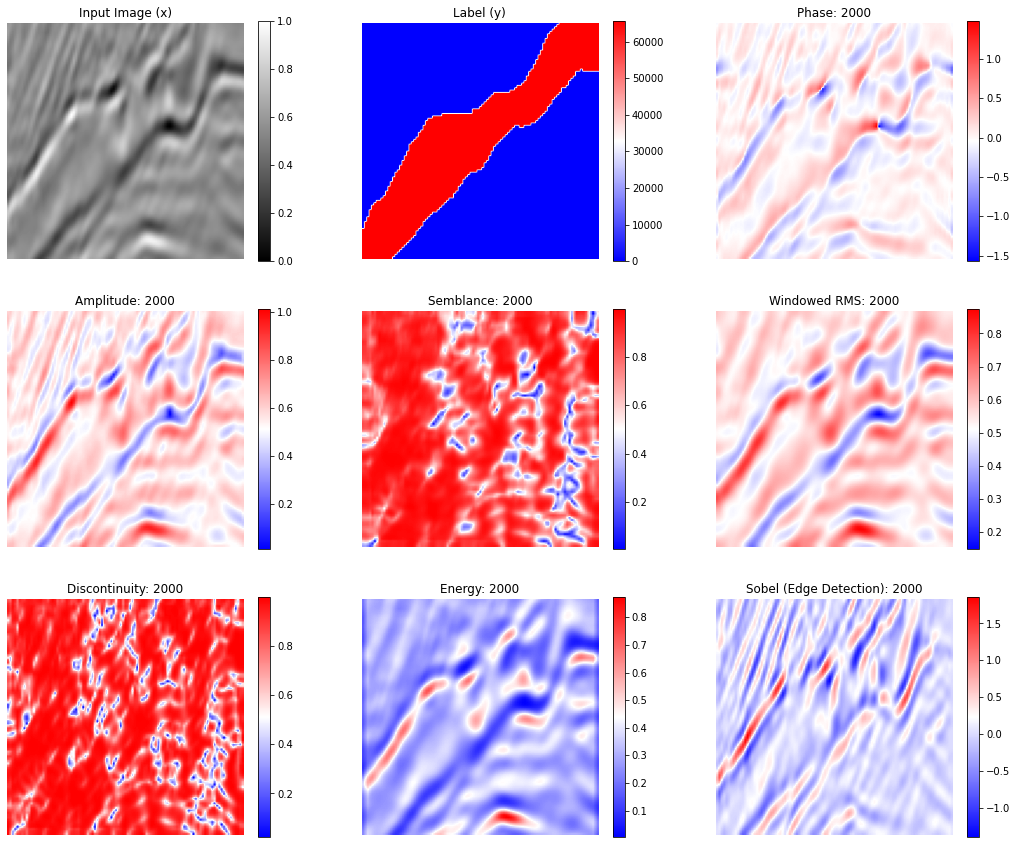

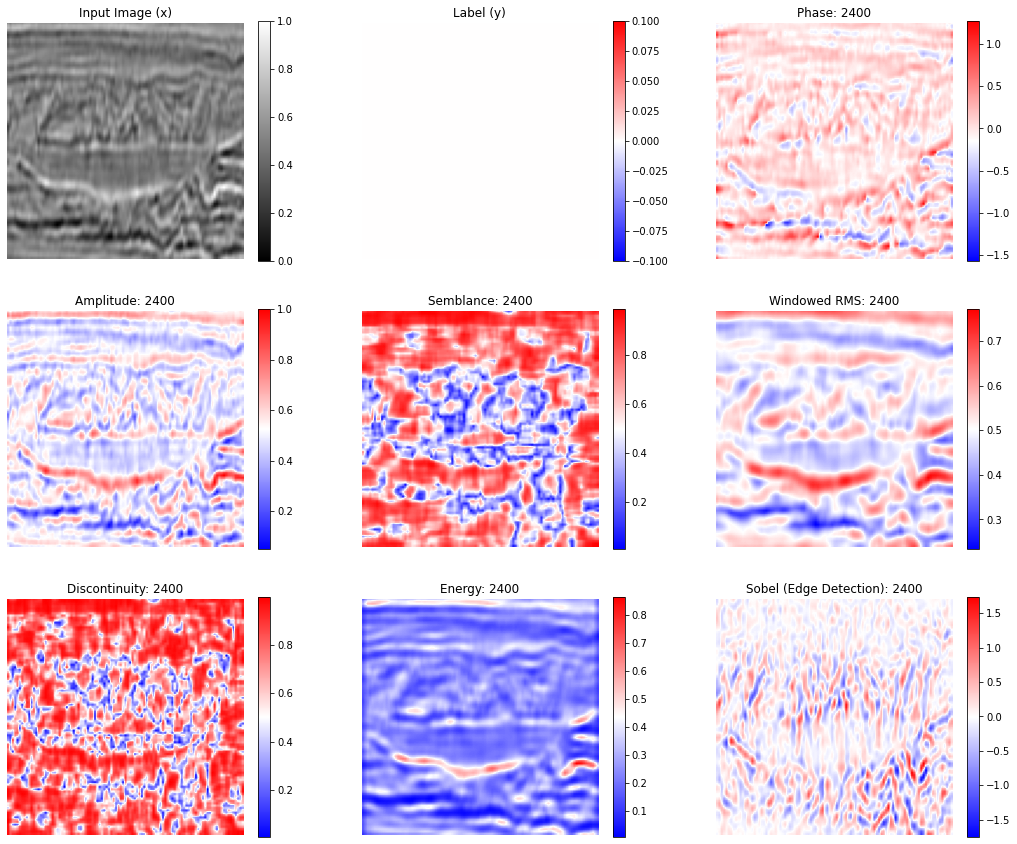

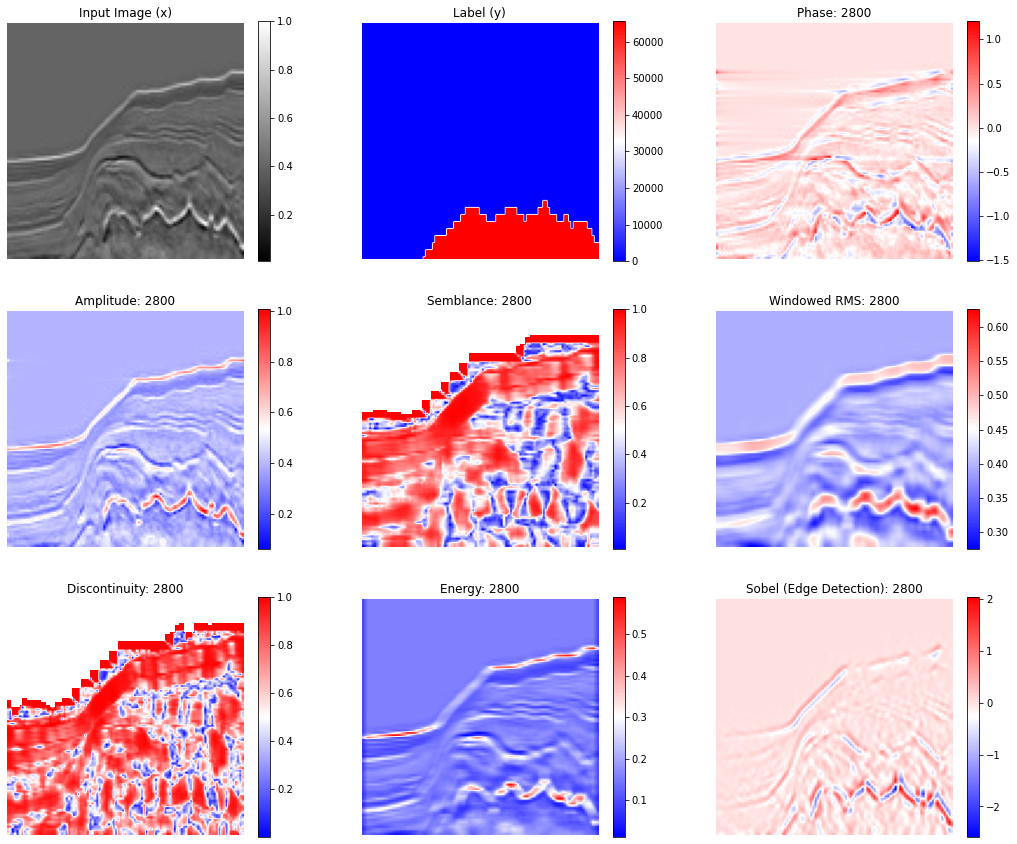

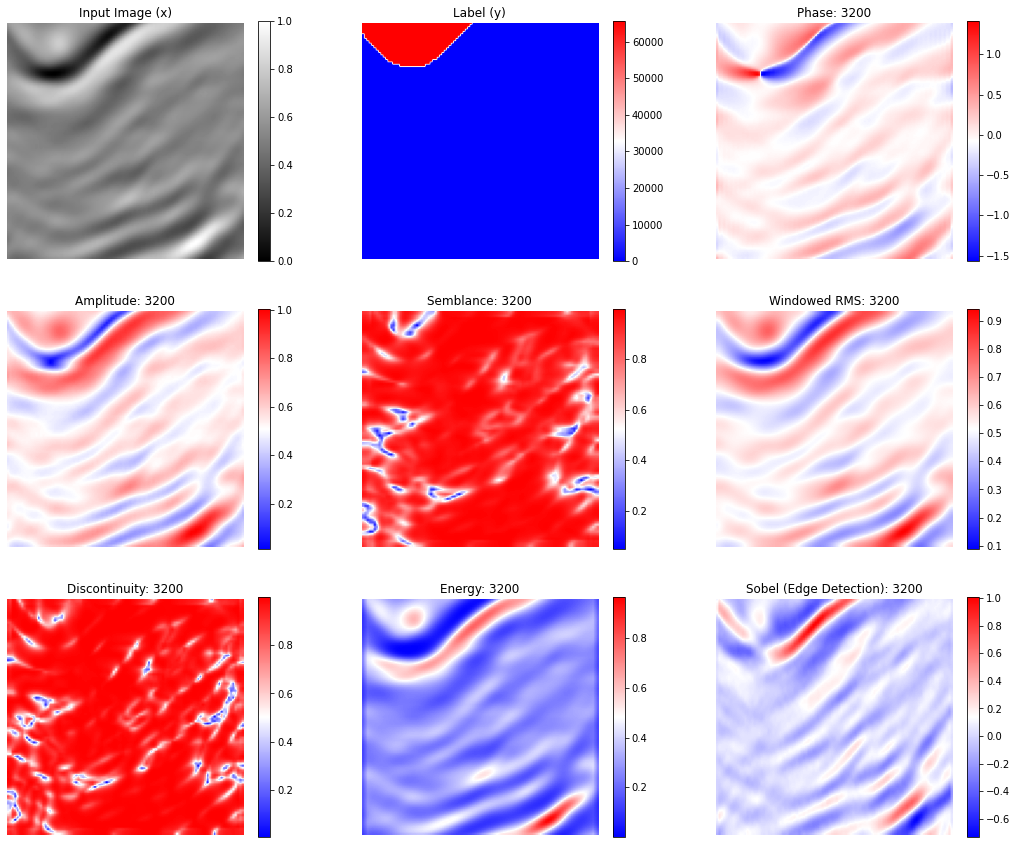

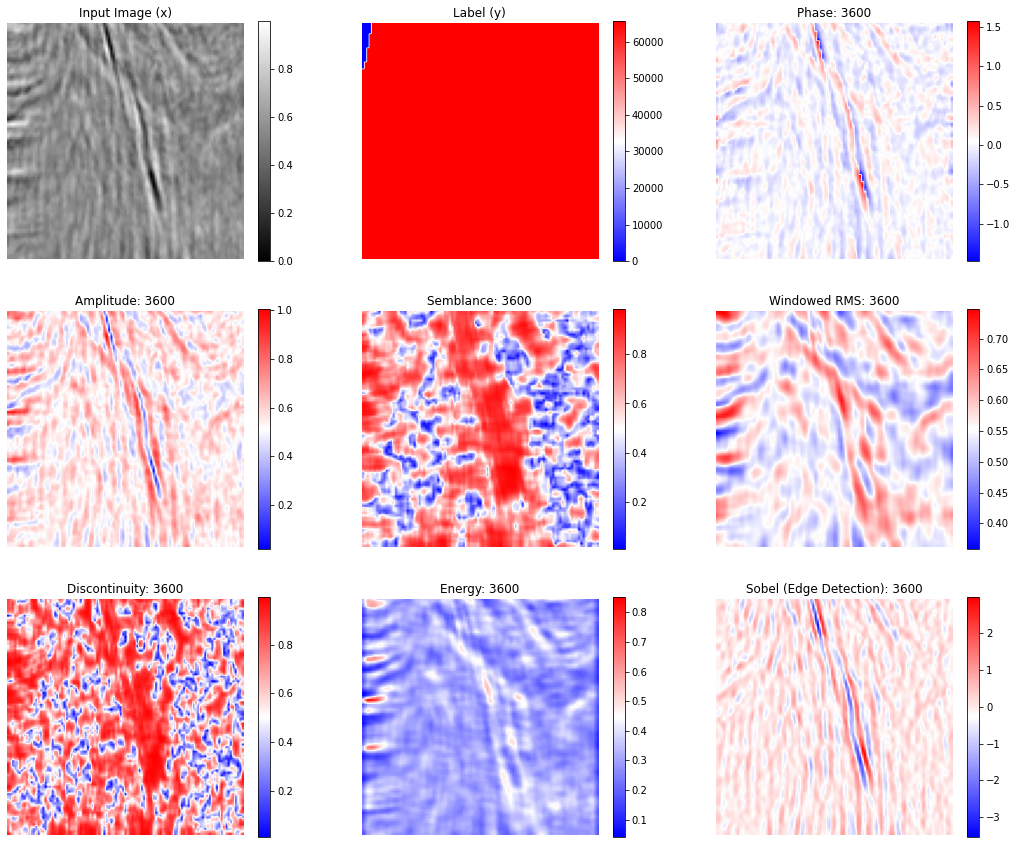

In [29]:
for instance in range(0, 4000, 400):
    i = 2
    instance = instance

    attr_dict = run_attributes(x[instance])

    fig, axes = plt.subplots(3,3, figsize=(18, 15), sharex=True, sharey=True)
    im = axes[0,0].imshow(x[instance], cmap='gray')
    plt.colorbar(im, ax=axes[0, 0])
    im = axes[0,1].imshow(y[instance], cmap='bwr')
    plt.colorbar(im, ax=axes[0, 1])
    axes[0,0].set_title('Input Image (x)')
    axes[0,1].set_title('Label (y)')
    axes[0,0].set_xlabel('Distance')
    axes[0,0].set_ylabel('Depth')
    axes[0,0].axis('off')
    axes[0,1].axis('off')

    for key, values in attr_dict.items():
        ax = axes.flat[i]
        im = ax.imshow(values, cmap='bwr')   
        plt.colorbar(im, ax=ax)
        ax.set_title(f'{key}: {instance}')
        i+=1
        ax.axis('off')
        
    fig.savefig(f'Figures/Attributes_Instance{instance}')
    

